[View in Colaboratory](https://colab.research.google.com/github/Gregory-Eales/Abolone-Classification/blob/master/Abalone_Classification.ipynb)

In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [194]:
# importing data and cleaning
from numpy import loadtxt
import urllib3
http = urllib3.PoolManager()
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
raw_data = http.request('GET', url)
raw_data = raw_data.data.split("\n")
data = []
dataY = []
for i in range(len(raw_data)-1):
  data.append(raw_data[i].split(",")[1:])
  
  if raw_data[i].split(",")[0] == 'I':
    dataY.append([1, 0, 0])
    
  if raw_data[i].split(",")[0] == 'F':
    dataY.append([0, 0, 1])
    
  if raw_data[i].split(",")[0] == 'M':
    dataY.append([0, 1, 0])


data = np.array(data)
Y = np.array(dataY)
data[data == 'M'] = '1'
data[data == 'F'] = '1'
data[data == 'I'] = '1'
X = data.astype(float)



/usr/local/lib/python2.7/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [0]:
class NeuralNetwork(object):
  
  def __init__(self):
    self.w1 = np.random.random([8,10])
    self.w2 = np.random.random([10,3])
    self.historical_cost = []
  
  def forward(self, x):
    self.z1 = np.dot(x, self.w1)
    self.a1 = np.tanh(self.z1)
    self.z2 = np.dot(self.a1, self.w2)
    self.a2 = self.sigmoid(self.z2)
    return self.a2
    
    
  def train(self, x, y, alpha, iterations):
    self.alpha = alpha
    self.y = y
    self.x = x
    for iteration in range(iterations):
      self.forward(x)
      self.historical_cost.append(-self.cost_function())
      if iteration%1000 == 0:
        self.alpha = self.alpha*0.9
        print(-self.cost_function())
      self.back_prop()
      
      
  def back_prop(self):
    self.w1 = self.w1 - self.alpha * np.dot( self.x.T, np.dot(self.w2, ((self.y/self.a2 - (1-self.y)/(1-self.a2))*self.sigmoid_prime(self.z2)).T).T*self.tanh_prime(self.z1))/self.x.shape[0]
    self.w2 = self.w2 - self.alpha * np.dot(self.a1.T, (self.y/self.a2 - (1-self.y)/(1-self.a2)) * self.sigmoid_prime(self.z2))/self.x.shape[0]
    
  
  def cost_function(self):
    self.cost = np.sum(self.y*np.log(self.a2) + (1-self.y)*np.log(1-self.a2))/len(self.x)
    return self.cost
  
  def sigmoid(self, Z):
    return 1/(1+np.exp(-Z))
  
  def sigmoid_prime(self, Z):
    return -np.exp(-Z)/np.square(1+np.exp(-Z))
  
  def tanh_prime(self, Z):
    return 1 - np.square(np.tanh(Z))
  

11.27642987576161


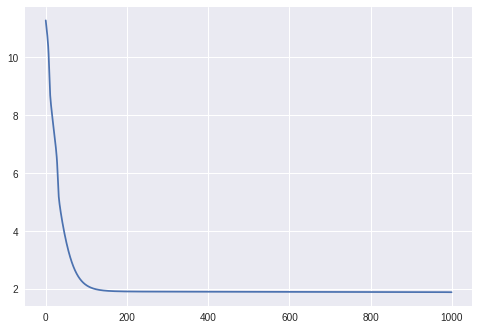

4177
The model is 100% accurate


In [196]:
NN = NeuralNetwork()
NN.forward(X)
NN.train(X, Y, 0.01, 1000)
plt.plot(NN.historical_cost)
plt.show()
predictions = NN.forward(X)
answers = Y

p = np.zeros_like(predictions)
p[np.arange(len(predictions)), predictions.argmax(1)] = 1



correct = 0
for i in range(len(p)):
  if p[i].all() == answers[i].all():
    correct += 1

print(correct)
    
print("The model is " + str((correct/len(p))*100) + "% accurate")    
                         
      
